**STUDENT ADAPTABILITY TO ONLINE LEARNING**

##1.0 Introduction

### A) Introduction

With the unexpected breakout of COVID-19 in 2020 came the need to improve online systems in virtually every sector that involves physical human interaction, which includes the education sector. 

Having more educational institutions providing online options has had many benefits, such as saving on transportation costs and removing location as a barrier to accessing a program, to name a few. A survey undertaken by Wiley Education Services showed that 85% of students liked the flexibility of online learning. Despite these benefits, online learning has its challenges, such as power outages and lack of good internet connection. There are therefore factors that influence whether a student adapts well to an online program, and our study aims to analyze some of these factors.


### B) Problem Statement

Online learning is becoming a new normal in our society. Low levels of adaptability to it can lead to a drop in performance, feeling unmotivated, and falling behind in coursework. Therefore it is important to identify factors that highly influence a student's adaptability level.


### C) Defining the question

 Our aim is to analyse and identify the factors that have a major influence on how well a student adapts to online learning, as these insights will help educational institutions come up with better strategies for implementing their online programs.

### D) Metric of Success



*   Identify the features that most affect a student's adaptability to online learning


*   Determine how the frequencies of the levels of adaptability selected vary according to the different features (for example adaptability by different genders, institution types etc).

*   Determine the most common values of the different features that were chosen by respondents (such as most common institution type, financial condition etc).

* Show how the various characteristics being analyzed (such as age, gender, location, adaptability level etc) correlate with each other.


*   Determine if there is a statistically significant relationship between the features gender and financial condition.








### E) Analysis Steps



1. Defining the research objectives.
2. Loading and cleaning the dataset.
3. Perform univariate, bivariate and multivariate analysis on the data and recording our observations.
4. Performing hypothesis testing.
5. Documentation of all the steps via a report

## 2.0  Loading the data

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


In [ ]:
# Loading the data
students = pd.read_csv('students.csv')


## 3.0  Checking and preparing the data

In [ ]:
# SIZE
print('This dataset has ' + str(students.shape[0]) + ' rows, and ' + str(students.shape[1]) + ' columns')

This dataset has 1205 rows, and 14 columns


In [ ]:
# A Glimpse
students.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
students.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [ ]:
# General Description of the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
# Removing whitespaces from the column names
students.columns = students.columns.str.lower().str.replace(' ', '_')

In [ ]:
# checking for missing values
students.isnull().sum()

gender                 0
age                    0
education_level        0
institution_type       0
it_student             0
location               0
load-shedding          0
financial_condition    0
internet_type          0
network_type           0
class_duration         0
self_lms               0
device                 0
adaptivity_level       0
dtype: int64

No missing values as observed

In [ ]:
# Checking for Unique Values
print(students.nunique())

gender                 2
age                    6
education_level        3
institution_type       2
it_student             2
location               2
load-shedding          2
financial_condition    3
internet_type          2
network_type           3
class_duration         3
self_lms               2
device                 3
adaptivity_level       3
dtype: int64


In [ ]:
# Checking for unique values in each column and seeing if there are any anomalies
for col in students.columns.to_list():
  print(f'{col} column unique values: \n')
  print(students[col].unique(), end='\n')
  print('**********')
  print('\n')

gender column unique values: 

['Boy' 'Girl']
**********


age column unique values: 

['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
**********


education_level column unique values: 

['University' 'College' 'School']
**********


institution_type column unique values: 

['Non Government' 'Government']
**********


it_student column unique values: 

['No' 'Yes']
**********


location column unique values: 

['Yes' 'No']
**********


load-shedding column unique values: 

['Low' 'High']
**********


financial_condition column unique values: 

['Mid' 'Poor' 'Rich']
**********


internet_type column unique values: 

['Wifi' 'Mobile Data']
**********


network_type column unique values: 

['4G' '3G' '2G']
**********


class_duration column unique values: 

['3-6' '1-3' '0']
**********


self_lms column unique values: 

['No' 'Yes']
**********


device column unique values: 

['Tab' 'Mobile' 'Computer']
**********


adaptivity_level column unique values: 

['Moderate' 'Low' 'High']
******

In [ ]:
#checking for duplicates
students.duplicated().any()

True

We will not drop any duplicates because unique respondents can have the same responses to the questions.

## 4.0 Exploratory Data Analysis

### Univariate Analysis

**Value Counts**

In [ ]:
# Value Counts

print(students['gender'].value_counts())
print('**********')
print(students['age'].value_counts())
print('**********')
print(students['education_level'].value_counts())
print('**********')
print(students['institution_type'].value_counts())
print('**********')
print(students['it_student'].value_counts())
print('**********')
print(students['location'].value_counts())
print('**********')
print(students['load-shedding'].value_counts())
print('**********')
print(students['financial_condition'].value_counts())
print('**********')
print(students['internet_type'].value_counts())
print('**********')
print(students['network_type'].value_counts())
print('**********')
print(students['class_duration'].value_counts())
print('**********')
print(students['self_lms'].value_counts())
print('**********')
print(students['device'].value_counts())
print('**********')
print(students['adaptivity_level'].value_counts())

Boy     663
Girl    542
Name: gender, dtype: int64
**********
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: age, dtype: int64
**********
School        530
University    456
College       219
Name: education_level, dtype: int64
**********
Non Government    823
Government        382
Name: institution_type, dtype: int64
**********
No     901
Yes    304
Name: it_student, dtype: int64
**********
Yes    935
No     270
Name: location, dtype: int64
**********
Low     1004
High     201
Name: load-shedding, dtype: int64
**********
Mid     878
Poor    242
Rich     85
Name: financial_condition, dtype: int64
**********
Mobile Data    695
Wifi           510
Name: internet_type, dtype: int64
**********
4G    775
3G    411
2G     19
Name: network_type, dtype: int64
**********
1-3    840
3-6    211
0      154
Name: class_duration, dtype: int64
**********
No     995
Yes    210
Name: self_lms, dtype: int64
**********
Mobile      1013
Computer     162
Tab           30

**Plots** showing count

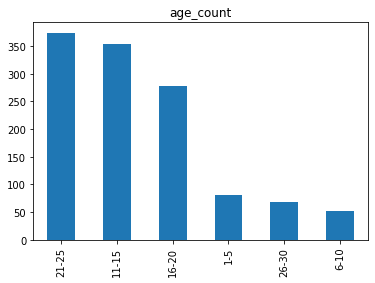

In [ ]:
students['age'].value_counts().plot.bar(title='age_count')

The student age group most represented is age 21-25

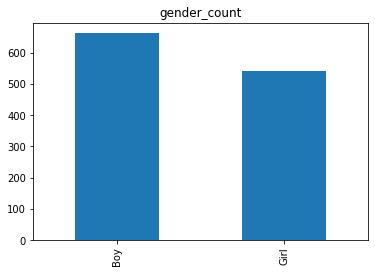

In [ ]:
students['gender'].value_counts().plot.bar(title='gender_count')

There are more male than female respondents.

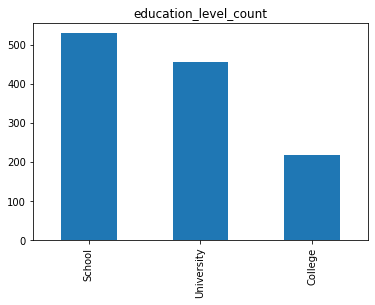

In [ ]:
students['education_level'].value_counts().plot.bar(title='education_level_count')

Most respondents are studying at the school level (ranges from 
nursery to high school).

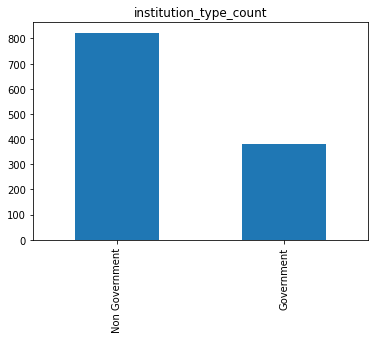

In [ ]:
students['institution_type'].value_counts().plot.bar(title='institution_type_count')

Most respondents are studying at non-government educational institutions.

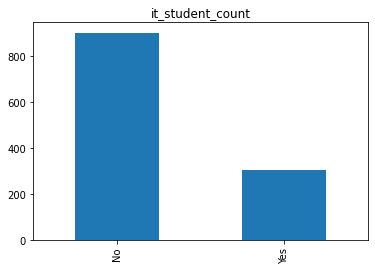

In [ ]:
students['it_student'].value_counts().plot.bar(title='it_student_count')

Most respondents are not IT students.

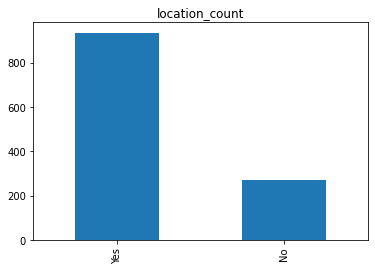

In [ ]:
students['location'].value_counts().plot.bar(title='location_count')

Most students were located in town as opposed to rural areas.

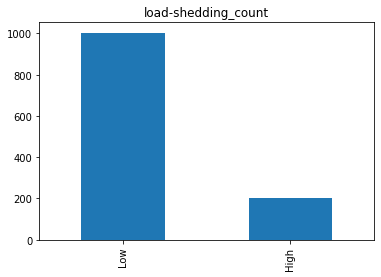

In [ ]:
students['load-shedding'].value_counts().plot.bar(title='load-shedding_count')

Most of the students are in areas that experience low load-shedding (electricity cut-off).

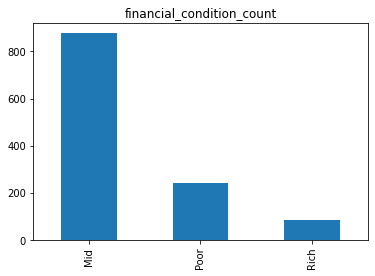

In [ ]:
students['financial_condition'].value_counts().plot.bar(title='financial_condition_count')

The financial condition of most students is average.

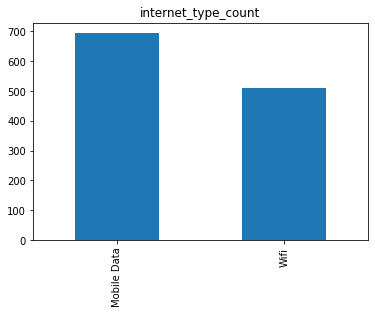

In [ ]:
students['internet_type'].value_counts().plot.bar(title='internet_type_count')

Most of the students use mobile data to access their online classes.



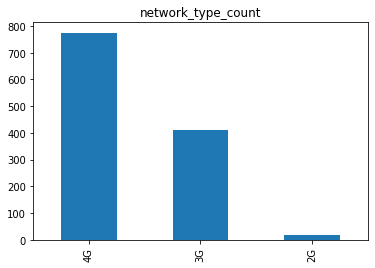

In [ ]:
students['network_type'].value_counts().plot.bar(title='network_type_count')

Most of the students have access to 4G network.

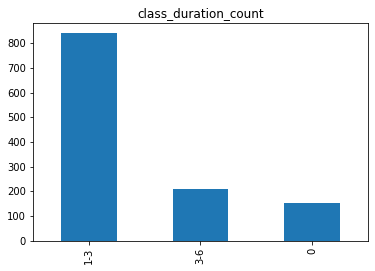

In [ ]:
students['class_duration'].value_counts().plot.bar(title='class_duration_count')

Most students have classes whose duration ranges from 1 to 3 hours.

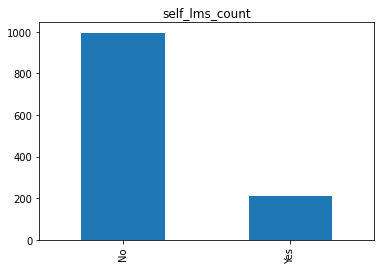

In [ ]:
students['self_lms'].value_counts().plot.bar(title='self_lms_count')

Most respondents are in educational institutions that do not have their own learning management system.

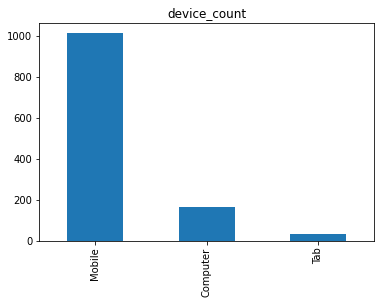

In [ ]:
students['device'].value_counts().plot.bar(title='device_count')

The device most commonly used to access online classes is mobile.

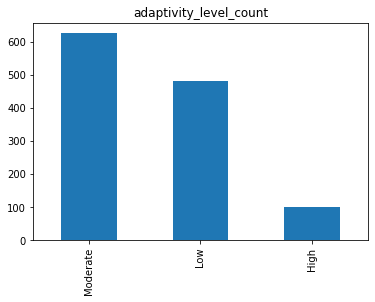

In [ ]:
students['adaptivity_level'].value_counts().plot.bar(title='adaptivity_level_count')

Most of the students had moderate level of adaptability to online schooling.

### Bivariate Analysis

In [ ]:
students.columns

Index(['gender', 'age', 'education_level', 'institution_type', 'it_student',
       'location', 'load-shedding', 'financial_condition', 'internet_type',
       'network_type', 'class_duration', 'self_lms', 'device',
       'adaptivity_level'],
      dtype='object')

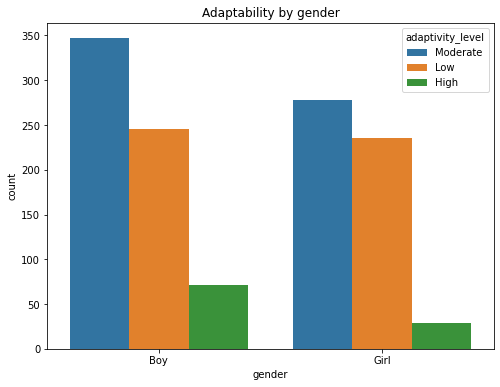

In [ ]:
# Adaptability by gender 

sns.countplot(x='gender', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by gender')
plt.gcf().set_size_inches(8, 6)
plt.show()

Both male and female students showed a similar pattern in the level of adaptability. For both genders, most students had a moderate level of adaptability.

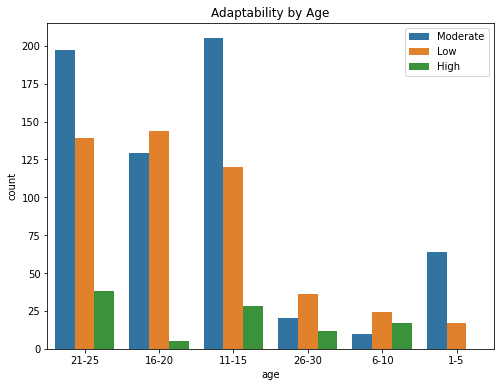

In [ ]:
# Adaptability by age 

sns.countplot(x='age', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Age')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

**For respondents:**

**1. Aged 26-30:**
* Most had a low level of adaptability to online education.

**2. Aged 21-25:**
* Most had a moderate level of adaptability to online education.

**3. Aged 16-20:**
* Most had a low level of adaptability to online education.

**4. Aged 11-15:**
* Most had a moderate level of adaptability to online education.

**5. Aged 6-10:**
* Most had a low level of adaptability to online education.

**6. Aged 1-5:**
* Most had a moderate level of adaptability to online education.


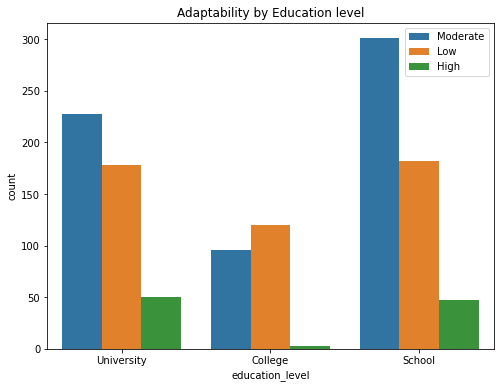

In [ ]:
# Adaptability by education level 

sns.countplot(x='education_level', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Education level')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

For students studying at:

**1. University level:**
* Most had moderate adaptability to online education

**2. College education level:**
* Most had low adaptability to online education
* As opposed to universities, stand-alone colleges have 2-4 year certifications and no have graduate courses, may be more specialised.

**3. School level:**
* Most had moderate adaptability to online education 
* Ranges from nursery to high school.

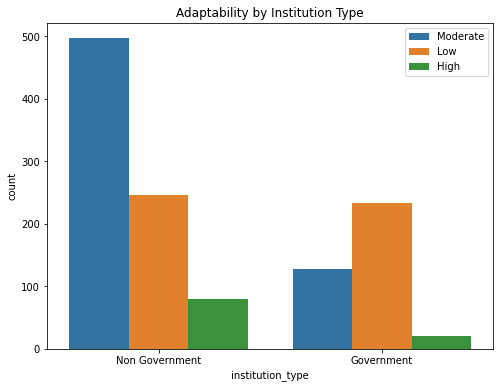

In [ ]:
# Adaptability by institution type 

sns.countplot(x='institution_type', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Institution Type')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

Most of the students in non-government educational institutions had a moderate level of adaptability to online education, while most of those in government educational institutions had a low level of adaptability. 

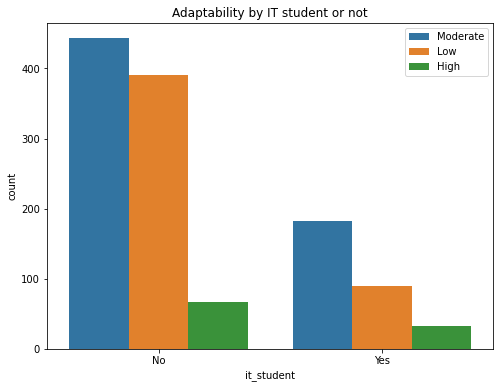

In [ ]:
# Adaptability by IT student or not 

sns.countplot(x='it_student', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by IT student or not')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

For both IT and non-IT students, most had a moderate level of adaptability to online education.

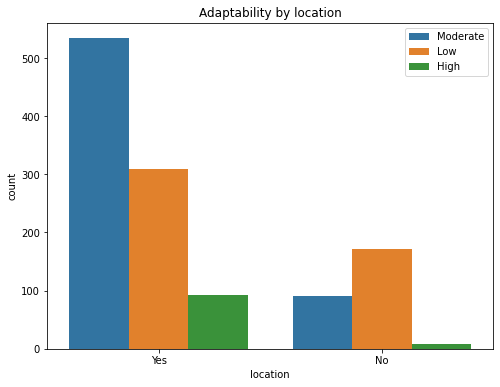

In [ ]:
# Adaptability by location 

sns.countplot(x='location', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by location')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()
#Yes == 'in town'
#No == 'not in town'

Most of the students located in town had a moderate level of adaptability to online education while most of those in rural areas had a low level of adaptability.

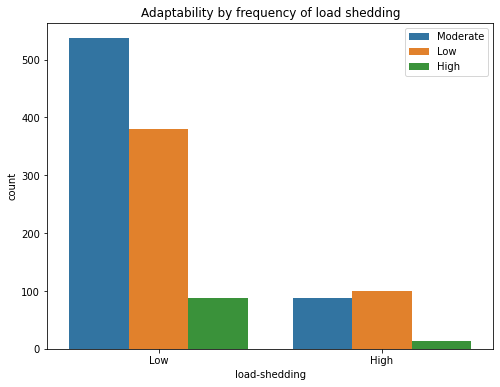

In [ ]:
# Adaptability by frequency of load shedding  

sns.countplot(x='load-shedding', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by frequency of load shedding')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

Most of the students in areas with low load-shedding had a moderate level of adaptability to online education while most of those in areas experiencing high load-shedding had a low level of adaptability.

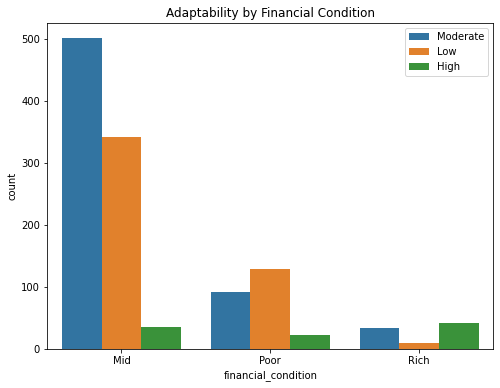

In [ ]:
# Adaptability by financial condition  

sns.countplot(x='financial_condition', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Financial Condition')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

**For the students whose financial condition is:**

**1. Rich:**
* Most had a high level of adaptability to online education.

**2. Mid:**
* Most had a moderate level of adaptability to online education.

**3. Poor:**
* Most had a low level of adaptability to online education.

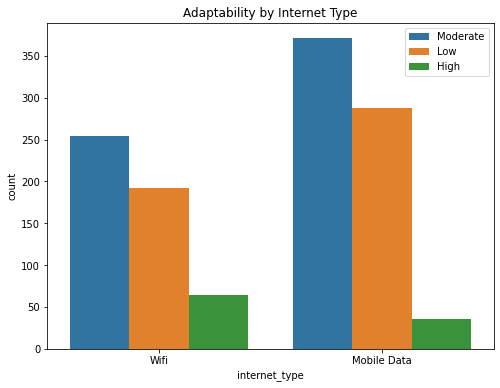

In [ ]:
# Adaptability by internet type 

sns.countplot(x='internet_type', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Internet Type')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

Most students who use wifi to access their online classes had a moderate level of adaptability to online education, and that was the same for most students using mobile data.

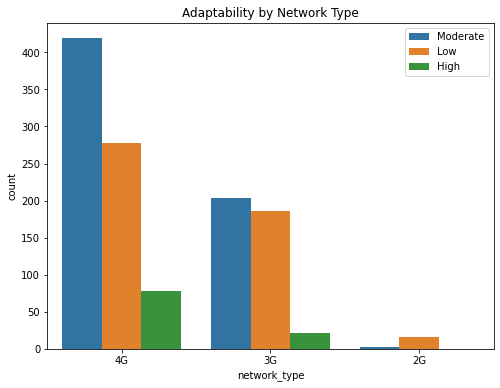

In [ ]:
# Adaptability by network type 

sns.countplot(x='network_type', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Network Type')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

**For the students who rely on:**

**1. 4G Network:**
* Most had a moderate level of adaptability to online education.

**2. 3G Network:**
* Most had a moderate level of adaptability to online education.

**3. 2G Network:**
* Most had a low level of adaptability to online education.

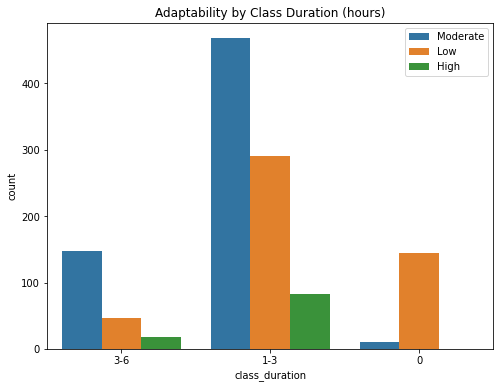

In [ ]:
# Adaptability by class duration (hours)

sns.countplot(x='class_duration', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Class Duration (hours)')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

**For the students whose classes are:**

**1. 3-6 hours:**
* Most had a moderate level of adaptability to online education.

**2. 1-3 hours:**
* Most had a moderate level of adaptability to online education.

**3. < 1 hour (0 hours):**
* Most had a low level of adaptability to online education.

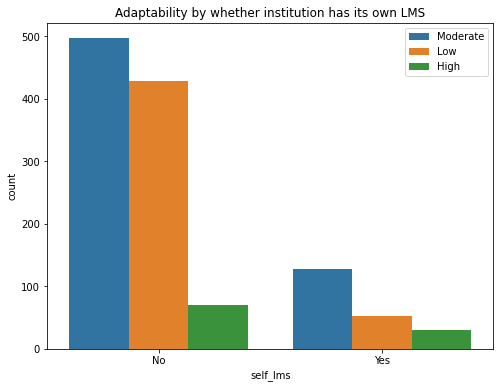

In [ ]:
# Adaptability by whether institution has its own LMS 

sns.countplot(x='self_lms', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by whether institution has its own LMS')
plt.gcf().set_size_inches(8, 6)
plt.legend(loc='upper right')
plt.show()

For students whose institution has its own LMS, most had a moderate level of adapability to online education, which is similar for most students whose institution does not have its own LMS.

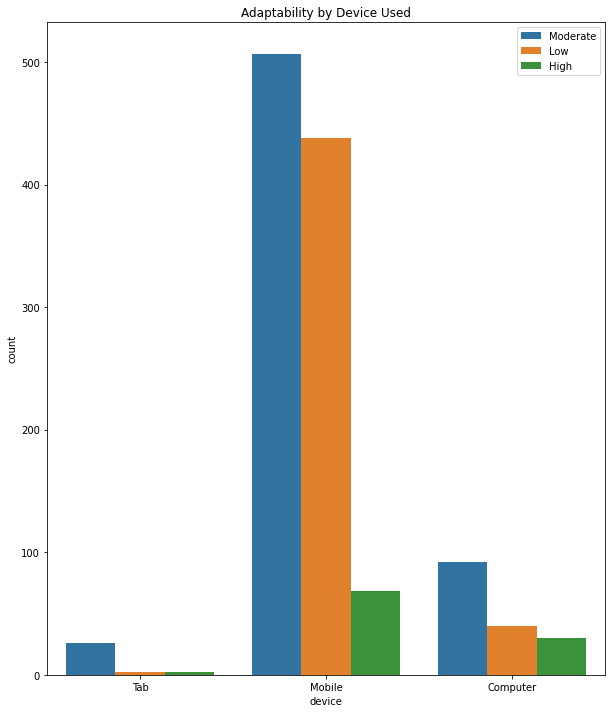

In [ ]:
# Adaptability by device used 

sns.countplot(x='device', hue = 'adaptivity_level', data=students)
plt.title('Adaptability by Device Used')
plt.gcf().set_size_inches(10, 12)
plt.legend(loc='upper right')
plt.show()

**For the students using the following to access their online classes:**

**1. Mobile devices:**
* Most had a moderate level of adaptability to online education.

**2. Computer:**
* Most had a moderate level of adaptability to online education.

**3. Tab:**
* Most had a moderate level of adaptability to online education.

In [ ]:
#replacing categorical data with numerical representations for further analysis

from sklearn.preprocessing import LabelEncoder
stud_enc = students.copy()
enc = LabelEncoder()

for col in list(stud_enc.columns):
  stud_enc[col] = enc.fit_transform(stud_enc[col])
stud_enc

,gender,age,education_level,institution_type,it_student,location,load-shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


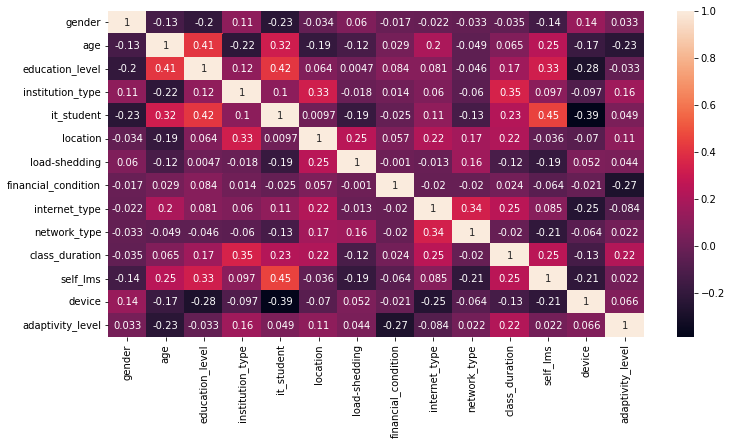

In [ ]:
# creating a correlation heat map

sns.heatmap(stud_enc.corr(),annot=True)
plt.gcf().set_size_inches(12,6)
plt.show()

Looking at the absolute values of the coefficients, financial condition, age, class duration and institution type (in that order) seem to be the most correlated to the adaptivity level. We will carry out multivariate analysis to identify with more accuracy which features influence the adaptivity level most.

### **Multivariate Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
stud_enc = students.copy()
enc = LabelEncoder()

for col in list(stud_enc.columns):
  stud_enc[col] = enc.fit_transform(stud_enc[col])
stud_enc

,gender,age,education_level,institution_type,it_student,location,load-shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


In [ ]:
#splitting dataset to features and label
X = stud_enc.drop(['adaptivity_level'], axis=1)
y = stud_enc['adaptivity_level']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_ = lda.fit(X, y)

lda_.coef_[0]


array([-0.63327793,  0.6977972 , -0.3332872 ,  1.01419786, -0.65977121,
        0.582106  ,  0.51873343,  2.47057007,  0.28712657,  0.7468    ,
       -0.08626882,  1.3038031 , -0.80828292])

In [ ]:
#finding features the coefficients correspond to 
pd.DataFrame(index=X.columns.values, data=lda_.coef_[0])

,0
gender,-0.633278
age,0.697797
education_level,-0.333287
institution_type,1.014198
it_student,-0.659771
location,0.582106
load-shedding,0.518733
financial_condition,2.470570
internet_type,0.287127
network_type,0.746800


In [ ]:
#sign of the coefficient
def sign(x):
  if x > 0:
    return 'positive'
  else:
    return 'negative'

In [ ]:
#Ranking
#the higher the absolute value of the coefficient of a feature the greater
#its contribution to discriminating between the groups 

abs_coeff = pd.DataFrame(pd.DataFrame(index=X.columns.values, data=lda_.coef_[0])[0].apply( lambda x: abs(x)))
abs_coeff['sign'] = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0])[0].apply( lambda x: sign(x))
abs_coeff.sort_values(by=0, ascending = False)

,0,sign
financial_condition,2.470570,positive
self_lms,1.303803,positive
institution_type,1.014198,positive
device,0.808283,negative
network_type,0.746800,positive
age,0.697797,positive
it_student,0.659771,negative
gender,0.633278,negative
location,0.582106,positive
load-shedding,0.518733,positive


## 5.0 Sampling

#### Why sampling and method chosen

We would like to carry out a Pearson chi-squared test to test for the existence of a relationship between the gender of a student and their financial condition.
For this test, a sample size less than 50 ([reference](https://passel2.unl.edu/view/lesson/9beaa382bf7e/14#:~:text=Another%20consideration%20one%20must%20make,recommend%20using%20Fisher's%20exact%20test.)) or ~500 or greater  ([reference](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/using-chi-square-statistic-in-research/)) may affect the reliability of the p-value obtained. Given that the dataset has 1205 rows, we will obtain a smaller sample size (20%) to carry out the test.

The sampling method will be stratified sampling. This is so that the proportions of the different genders and financial conditions in the dataset are equally represented in the sample.

#### Process

In [ ]:
sample = students.groupby(['gender','financial_condition'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))
# proportion of the non_stratified plus stratified sample
print('Proportions in dataset')
print(round((students['financial_condition'].value_counts()/1205), 2))

print(round((students['gender'].value_counts()/1205), 2))
print('')
print('************************')
#proportion of stratified
print('Proportions in sample')
print(round((sample['financial_condition'].value_counts()/241), 2))

print(round((sample['gender'].value_counts()/241), 2))


Proportions in dataset
Mid     0.73
Poor    0.20
Rich    0.07
Name: financial_condition, dtype: float64
Boy     0.55
Girl    0.45
Name: gender, dtype: float64

************************
Proportions in sample
Mid     0.73
Poor    0.20
Rich    0.07
Name: financial_condition, dtype: float64
Boy     0.55
Girl    0.45
Name: gender, dtype: float64


## 6.0 Hypothesis test

#### 1. Stating the null and alternative hypothesis

**Null hypothesis**

Ho : There is no significant relationship between the gender of the student and their financial condition.

**Alternative hypothesis**

Ha : There is a significant relationship between the gender of the student and their financial condition. (claim)


#### 2. Setting the significance level 

The significance level a = 0.05. If the probability of the null hypothesis being true falls below this level the null is rejected.

#### 3. Calculating the test statistic and corresponding p value

##### Choosing test statistic 

The test that will be used is Pearson's chi-squared statistic. This is because we want to test for the existence of a statistically significant relationship between two categorical variables (gender and education level).

##### Calculation of test statistic

In [ ]:
#creating contingency table, using our sample
table = pd.crosstab(index=sample['gender'], columns=sample['financial_condition'])
table

financial_condition,Mid,Poor,Rich
gender,,,
Boy,96,26,10
Girl,79,23,7


In [ ]:
#computing row totals
table['total'] = table.sum(axis=1)
table

financial_condition,Mid,Poor,Rich,total
gender,,,,
Boy,96,26,10,132
Girl,79,23,7,109


In [ ]:
table.loc['Total'] = [table.Mid.sum(), table.Poor.sum(), table.Rich.sum(), table.total.sum()]

In [ ]:
#computing totals of columns
table

financial_condition,Mid,Poor,Rich,total
gender,,,,
Boy,96,26,10,132
Girl,79,23,7,109
Total,175,49,17,241


The first step is to compute the expected frequency for each cell (except totals) based on the assumption that there is no relationship.

The expected frequency for a cell in the ith row and the jth column is equal to:

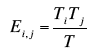

where Ei,j is the expected frequency for cell i,j, Ti is the total for the ith row, Tj is the total for the jth column, and T is the total number of observations

In [ ]:
#Expected frequencies

#creating duplicate table that will have values replaced with expected frequencies
expected_freq = table.copy().drop(columns = ['total'], index=['Total'])

In [ ]:
#creating lists of genders and financial levels
genders = list(expected_freq.index)
fin_lev = list(expected_freq.columns)


In [ ]:
#creating for loop that will replace table values with expected frequencies
for g in genders:
  for l in fin_lev:
    row_tot = 0
    col_tot = 0
    if g == 'Boy':
      row_tot = 132
    else:
      row_tot = 109
    if l == 'Mid':
      col_tot = 175
    elif l == 'Poor':
      col_tot = 49
    elif l == 'Rich':
      col_tot = 17
    expected_freq.loc[g, l] = (row_tot * col_tot)/241

In [ ]:
expected_freq

financial_condition,Mid,Poor,Rich
gender,,,
Boy,95.850622,26.838174,9.311203
Girl,79.149378,22.161826,7.688797


Formula for calculating the statistic:

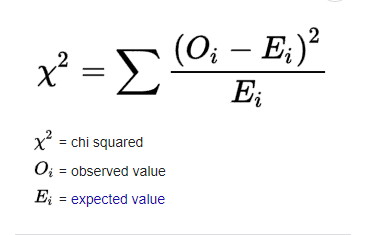

In [ ]:
#getting the values of (observed value - expected)/expected for each cell
one = (table.loc['Boy', 'Mid'] - expected_freq.loc['Boy', 'Mid'])**2/expected_freq.loc['Boy', 'Mid']
two = (table.loc['Boy', 'Poor'] - expected_freq.loc['Boy', 'Poor'])**2/expected_freq.loc['Boy', 'Poor']
three = (table.loc['Boy', 'Rich']  - expected_freq.loc['Boy', 'Rich'] )**2/expected_freq.loc['Boy', 'Rich']

four = (table.loc['Girl', 'Mid'] - expected_freq.loc['Girl', 'Mid'])**2/expected_freq.loc['Girl', 'Mid']
five = (table.loc['Girl', 'Poor'] - expected_freq.loc['Girl', 'Poor'] )**2/expected_freq.loc['Girl', 'Poor']
six = (table.loc['Girl', 'Rich']  - expected_freq.loc['Girl', 'Rich'] )**2/expected_freq.loc['Girl', 'Rich']

In [ ]:
#getting the sum of the above to get the chi square statistic
chi_sq = one+two+three+four+five+six
chi_sq

0.17105098586557227

In [ ]:
#degrees of freedom is equal to (r-1)(c-1),
(2-1) * (3-1)

2

##### P-value calculation

Using this chi squared statistic p value calculator -[here](https://www.mathsisfun.com/data//chi-square-calculator.html):

The p value, given our statistic (0.171) and 2 degrees of freedom,  is 0.918

##### Using chi2_contingency

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(index=sample['gender'], columns=sample['financial_condition']))
alpha = 0.05
print(f'chi squared statistic is {round((stat), 3)}')
print(f'p level is {round((p), 3)}')
if p <= alpha:
  print('Dependent (reject H0)')
else:
  print('Independent (H0 holds true)')

chi squared statistic is 0.171
p level is 0.918
Independent (H0 holds true)


#### Interpretation

Given that our p value is 0.918, which is much higher than our significance level of 0.05, there is very strong evidence for accepting our null hypothesis. Therefore, the conclusion is that there is no significant relationship between the gender of the student and their financial condition (a=0.05).


## 7.0 Conclusion and Recommendations

### Conclusion

Univariate, bivariate and multivariate analysis were carried out, providing valuable insights on the different variables in our dataset that may affect the adaptability level. These features included gender, age, education level, institution type, IT student or not, location, load-shedding, financial condition, internet type, network, device, class duration and whether the educational institution had a self learning management system. The levels of adaptability according to these different variables was visualised and interpreted. Then, using multivariate analysis, features were ranked in order of influence on a student’s adaptability to online education to aid in our aim of identifying the top features. The top 5 were determined to be:
* Financial condition of the student.
* Whether the student’s institution has an lms or not.
* The student’s institution type.
* The device the student uses.
* The network type.

Additionally, we carried out a Pearson’s chi-squared hypothesis test, and it was determined that there was no significant relationship between the gender of the student and their financial condition ( independent).


### Recommendations

Based on the top 5 features we identified, these are our recommendations:

* The government’s educational sector as well as private educational institutions should firstly prioritize finding ways to aid in subsidizing educational costs more, such as by introducing more scholarships, work-study, and favorable loan opportunities to aid in alleviating financial burden.

* Telecom companies should improve their coverage of higher level networks (3G, 4G) across their regions of operation. This will aid in ensuring that students in varying locations have access to reliable networks to facilitate their online learning. 

* Government educational institutions should receive more funding so that they can have sufficient resources to effectively adapt to changing environments. Some ways of securing more funding could be the government allocating more funds to the education sector, or finding ways to increase local and alumni donations.

* Educational institutions that are now primarily online should consider providing laptops, one-off allowances or favorable loans and discounts to aid in purchasing laptops so that the online learning experience is better for more students.

* Educational institutions should have their own well-functioning and structured learning management systems to better organise online learning.
